## 1. Import Libraries

In [3]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

PyTorch version: 2.9.1
Torchvision version: 0.24.1


## 2. Define Data Transformations

Before loading the data, we define transformations to:
- Convert images to PyTorch tensors
- Normalize pixel values to a standard range

MNIST images have pixel values from 0-255. We normalize them to have:
- Mean = 0.1307
- Standard deviation = 0.3081

These are the mean and std of the MNIST dataset, calculated across all training images.

In [4]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor and scale to [0, 1]
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST mean and std
])

print("Transformations defined:")
print("1. Convert to tensor (scales pixel values to [0, 1])")
print("2. Normalize with mean=0.1307, std=0.3081")

Transformations defined:
1. Convert to tensor (scales pixel values to [0, 1])
2. Normalize with mean=0.1307, std=0.3081


## 3. Load the MNIST Dataset

PyTorch's `torchvision.datasets` makes it easy to download and load MNIST.
The dataset will be automatically downloaded to the `../data` directory.

In [5]:
# Load training data
train_dataset = datasets.MNIST(
    root='../data',           # Where to save/load the data
    train=True,               # Load training set
    download=True,            # Download if not already present
    transform=transform       # Apply transformations
)

# Load test data
test_dataset = datasets.MNIST(
    root='../data',
    train=False,              # Load test set
    download=True,
    transform=transform
)

print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")

100.0%
100.0%
100.0%
100.0%

Training set size: 60000
Test set size: 10000


## 4. Explore the Dataset Structure

Let's look at a single sample to understand the data format.

In [6]:
# Get the first sample
image, label = train_dataset[0]

print(f"Image shape: {image.shape}")
print(f"Image type: {type(image)}")
print(f"Label: {label}")
print(f"Label type: {type(label)}")

print(f"\nImage details:")
print(f"  - Channels: {image.shape[0]} (grayscale)")
print(f"  - Height: {image.shape[1]} pixels")
print(f"  - Width: {image.shape[2]} pixels")
print(f"  - Min value: {image.min():.3f}")
print(f"  - Max value: {image.max():.3f}")

Image shape: torch.Size([1, 28, 28])
Image type: <class 'torch.Tensor'>
Label: 5
Label type: <class 'int'>

Image details:
  - Channels: 1 (grayscale)
  - Height: 28 pixels
  - Width: 28 pixels
  - Min value: -0.424
  - Max value: 2.821


## 5. Visualize Sample Images

Let's visualize some samples to see what the data looks like.

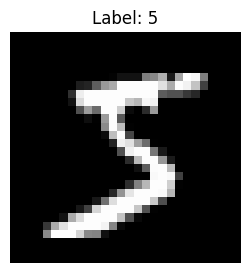

In [7]:
# Function to display an image
def show_image(image, label):
    # Remove channel dimension and convert to numpy
    image = image.squeeze().numpy()
    
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

# Display the first image
image, label = train_dataset[0]
plt.figure(figsize=(3, 3))
show_image(image, label)
plt.show()

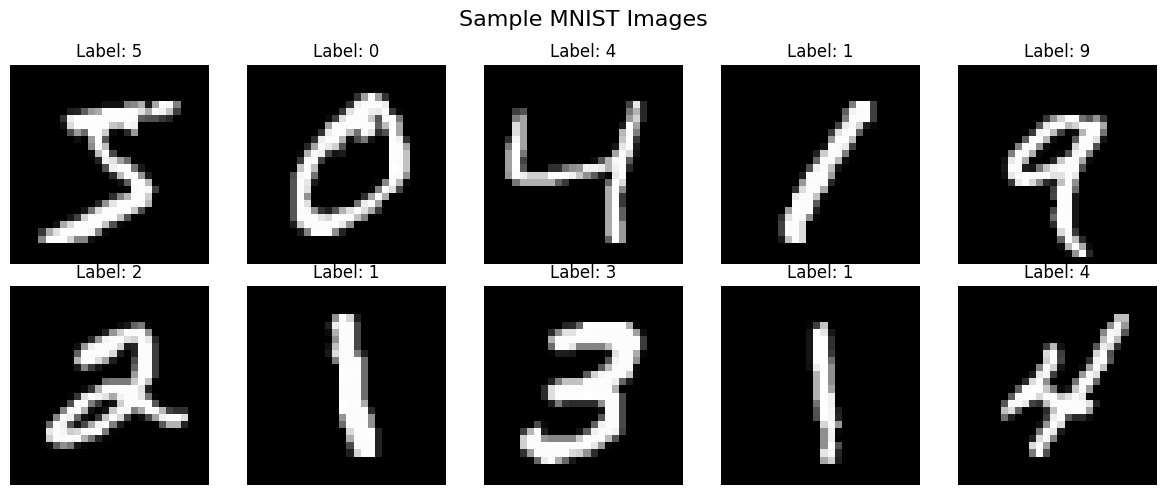

In [8]:
# Display a grid of sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    image, label = train_dataset[i]
    image = image.squeeze().numpy()
    
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 6. Visualize One Example of Each Digit

Let's find and display one example of each digit (0-9).

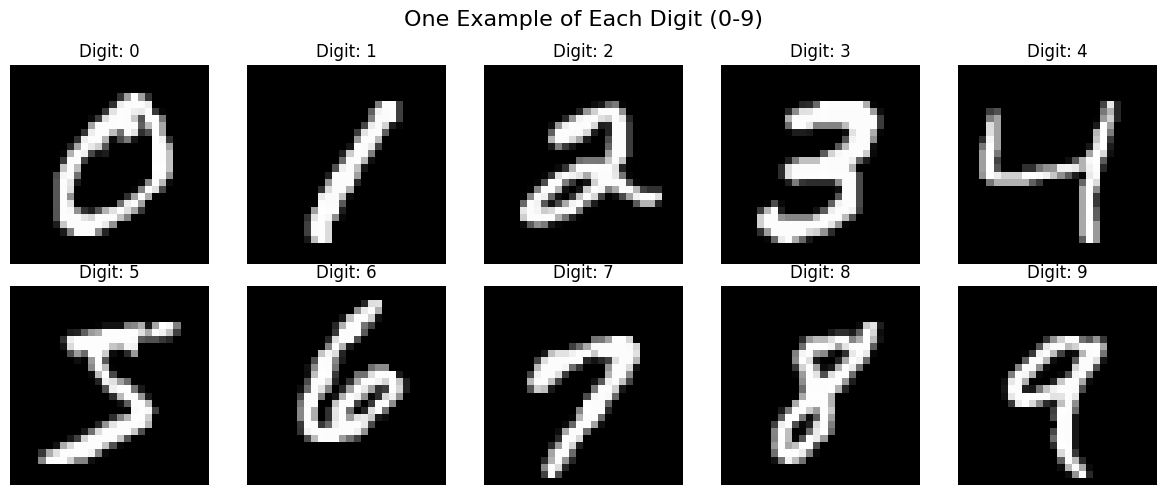

In [9]:
# Find one example of each digit
digit_examples = {}

for image, label in train_dataset:
    if label not in digit_examples:
        digit_examples[label] = image
    
    # Stop when we have all 10 digits
    if len(digit_examples) == 10:
        break

# Display them
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('One Example of Each Digit (0-9)', fontsize=16)

for digit in range(10):
    ax = axes[digit // 5, digit % 5]
    image = digit_examples[digit].squeeze().numpy()
    
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## 7. Analyze Class Distribution

Let's check if the dataset is balanced (roughly equal number of each digit).

Training set class distribution:
  Digit 0:  5923 samples (9.9%)
  Digit 1:  6742 samples (11.2%)
  Digit 2:  5958 samples (9.9%)
  Digit 3:  6131 samples (10.2%)
  Digit 4:  5842 samples (9.7%)
  Digit 5:  5421 samples (9.0%)
  Digit 6:  5918 samples (9.9%)
  Digit 7:  6265 samples (10.4%)
  Digit 8:  5851 samples (9.8%)
  Digit 9:  5949 samples (9.9%)


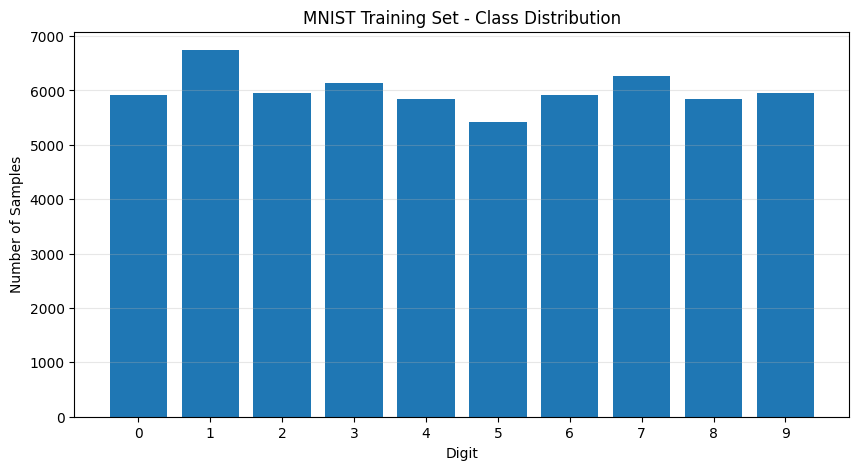


✓ The dataset is well-balanced!


In [10]:
# Count occurrences of each digit in training set
from collections import Counter

train_labels = [label for _, label in train_dataset]
label_counts = Counter(train_labels)

# Print counts
print("Training set class distribution:")
for digit in range(10):
    count = label_counts[digit]
    percentage = (count / len(train_dataset)) * 100
    print(f"  Digit {digit}: {count:5d} samples ({percentage:.1f}%)")

# Visualize distribution
plt.figure(figsize=(10, 5))
plt.bar(range(10), [label_counts[i] for i in range(10)])
plt.xlabel('Digit')
plt.ylabel('Number of Samples')
plt.title('MNIST Training Set - Class Distribution')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n✓ The dataset is well-balanced!")

## 8. Create Data Loaders

DataLoaders handle batching, shuffling, and parallel data loading.
This is crucial for efficient training.

In [11]:
# Set batch size
batch_size = 64

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,           # Shuffle training data
    num_workers=0           # Number of subprocesses for data loading (0 = main process)
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,          # Don't shuffle test data
    num_workers=0
)

print(f"Batch size: {batch_size}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Batch size: 64
Number of training batches: 938
Number of test batches: 157


## 9. Examine a Batch

Let's look at what a batch of data looks like.

In [12]:
# Get one batch from the train loader
batch_images, batch_labels = next(iter(train_loader))

print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"\nBatch breakdown:")
print(f"  - Batch size: {batch_images.shape[0]} images")
print(f"  - Channels: {batch_images.shape[1]}")
print(f"  - Height: {batch_images.shape[2]}")
print(f"  - Width: {batch_images.shape[3]}")
print(f"\nFirst 10 labels in batch: {batch_labels[:10].tolist()}")

Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])

Batch breakdown:
  - Batch size: 64 images
  - Channels: 1
  - Height: 28
  - Width: 28

First 10 labels in batch: [0, 1, 0, 6, 8, 6, 7, 2, 4, 0]


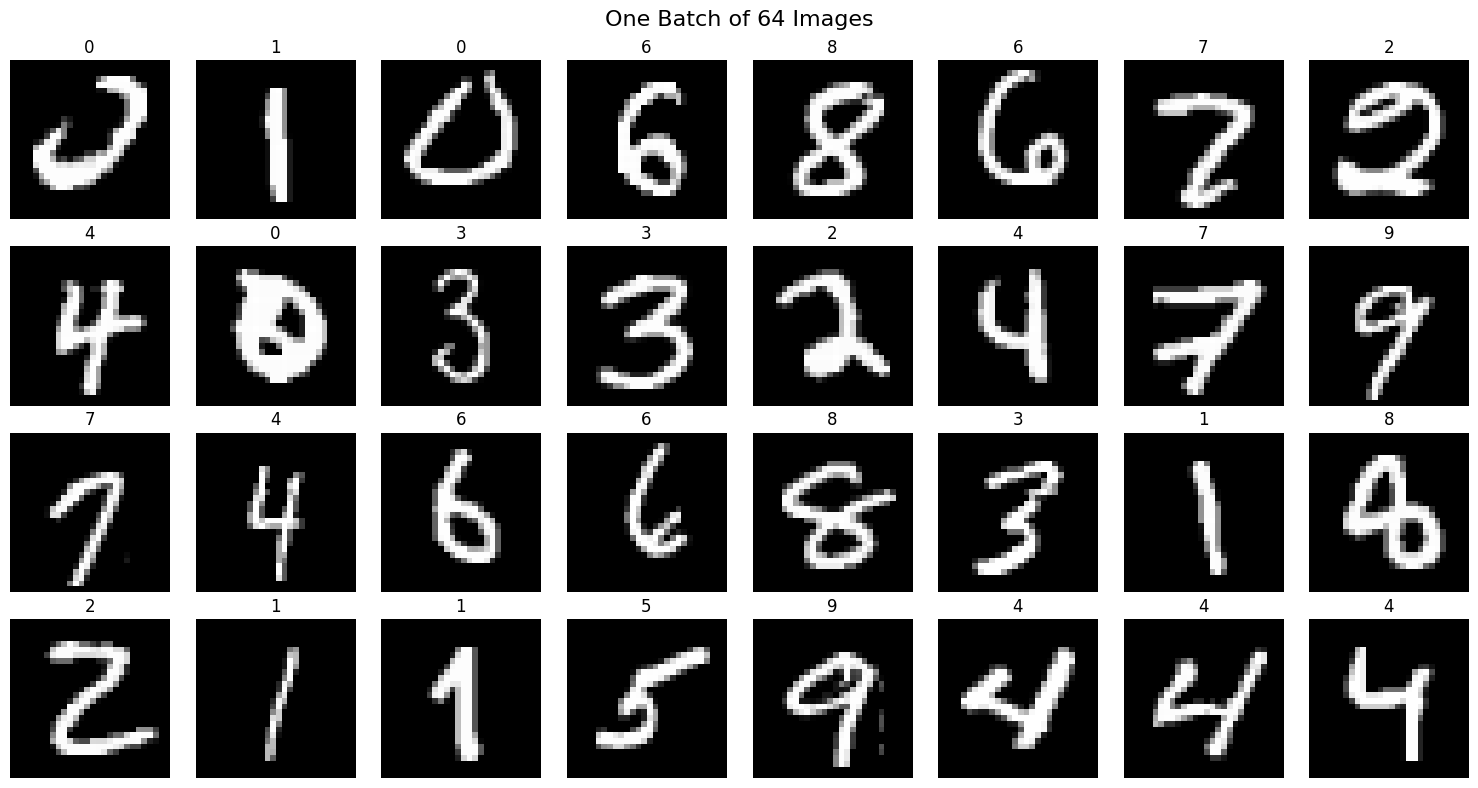

In [13]:
# Visualize a batch
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
fig.suptitle(f'One Batch of {batch_size} Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < len(batch_images):
        image = batch_images[i].squeeze().numpy()
        label = batch_labels[i].item()
        
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{label}")
        ax.axis('off')

plt.tight_layout()
plt.show()

## 10. Summary

Congratulations! You've completed Exercise 2. You now know:

✅ How to load the MNIST dataset using torchvision

✅ How to apply transformations (conversion to tensor and normalization)

✅ The structure of the MNIST dataset (60,000 training + 10,000 test images)

✅ How to visualize images and analyze the dataset

✅ How to create DataLoaders for efficient batching

✅ What a batch of data looks like

### Key Takeaways

- MNIST images are 28×28 grayscale pixels
- The dataset is well-balanced across all 10 digits
- Normalization helps neural networks train faster and more effectively
- DataLoaders handle batching and shuffling automatically

### Next Steps

In Exercise 3, we'll build a neural network to classify these digits!